# Exploring the Iris Dataset

This is the jupyter notebook I have written for the Pands 2021 project. I wrote the initial code in this notebook as it was easier for me to keep track of. I later created divided the sections into smaller files and wrote them in vscode. 

### Importing the libraries and loading the dataset.

In [8]:

# import the libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

print('done')

done


In [6]:
# This updates the plotting styles within the program to follow the seaborn style. Not needed,just the seaborn style looks better.
sns.set()

I'm loading the dataset directly from sklearn. I installed sklearn onto my machine already and found doing it this way easier than downloading the dataset as a csv file and loading it onto my jupyter notebook.

In [9]:
from sklearn import datasets
data = datasets.load_iris()
print("done")

done


### Getting a bried introduction to the dataset

Tells a little bit about the dataset.

In [24]:

print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The dataset is build on comparing 3 different species of iris flower based on 4 distinct features. The names of the 4 features are: 

In [25]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

This can also be achieved by stating 'df.columns'

In [26]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Adding the target to the dataset.

In [27]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [28]:
df["target"] = data["target"]

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The dataset has 150 data-points and 4 features. It then also has 1 class label for the target which was added above. If I ran the df.shape command before adding the target it would say that there are 4 features.

In [30]:
df.shape

(150, 5)

Species count checks the to see how this 150 data-points is distributed accross the 3 species. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


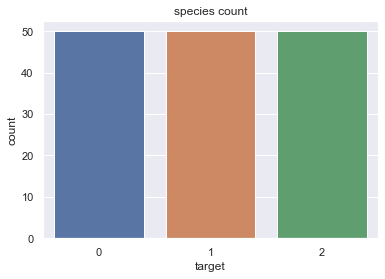

In [31]:
plt.title('species count')
sns.countplot(df['target']);

This can also be achieved by using the following command.

In [32]:
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

So from looking at the value counts of the 3 species we can see that there are 50 data-points for each. This means that the iris dataset is a balanced dataset.

The below 'describe' command gives an easy to read overview of the whole dataset. Below is a basic description of the data. It shows some basic statistics of the 4 features. Although it is a basic description it still gives some interesting information. For example that there is a big difference between the smallest petal length and the largest. There isn't as large a range in petal width.

In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Scatter Plots

Making scatter plots to compare how the features.

###### Comparing Sepal Width and Sepal Length

Below is a scatter plot to compare how the different species compare in regards to sepal width and sepal length. 
Setosa is in blue, versicolor is orange and virginica is green.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


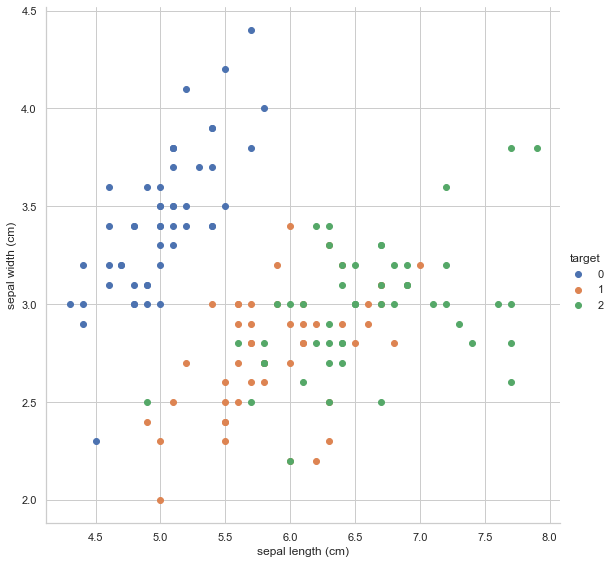

In [44]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="target", size=8)\
    .map(plt.scatter, "sepal length (cm)", "sepal width (cm)")\
    .add_legend()
plt.show();

From the above plot we can see that the setosa is blue tends have a much shorter sepal than the versicolor and virginica. It also tends to have a wider sepal when compared to the other two species.

###### Comparing Petal Width and Petal Length

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


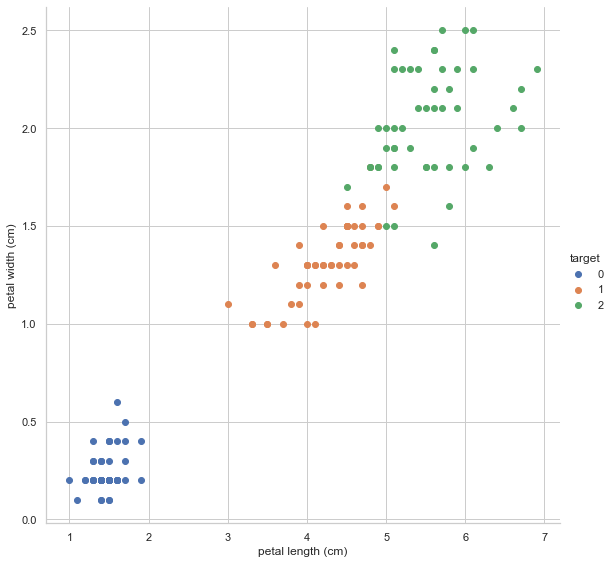

In [45]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="target", size=8)\
    .map(plt.scatter, "petal length (cm)", "petal width (cm)")\
    .add_legend()
plt.show();

Just like the sepal scatter plot the setosa stands out when we compare petal length and width. The Virginica and Versicolor have some crossover when we look at petal length and width. The virginica tends to have a larger petal in width and length though. The setosa species has a much smaller petal.

### Making Histograms

This following histogram shows the distribution of sepal length.

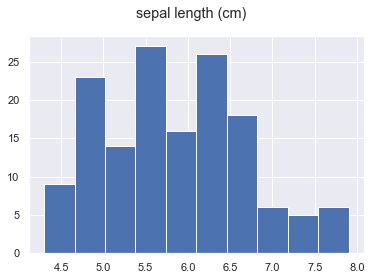

In [18]:
# first I set a variable named col and equal it to the column I want to use for the histogram. Then  I pass it into the histogram and finaly use it to make a title for the histogram. The final part I am saving the histogram as an image so it saves elsewhere in my directory.
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('sepallengthhist.png')
plt.show()

A basic histogram for Sepal Width

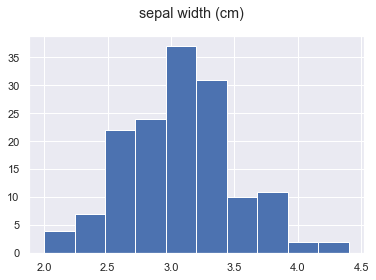

In [19]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('sepalwidththhist.png')
plt.show()

Histogram for Petal Length

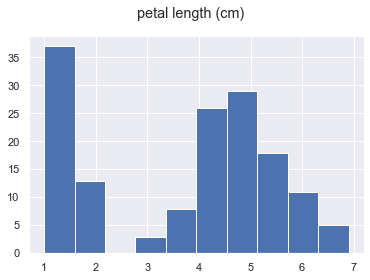

In [20]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('petallengthhist.png')
plt.show()

Histogram for Petal Width

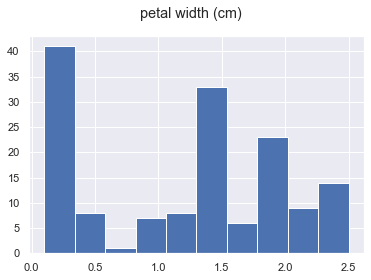

In [21]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('petalwidthhist.png')
plt.show()

Next I'm making a plot but I want the plot to say the flower that belongs to the particular number.
The target names first gives the name of each flower type in the dataset.
Then using ".map" I am assigning each number according to the target number.

In [22]:

data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
# gives the targets names for the plot. 0 = setosa, 1 = versicolor and 2 = virginica
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# checking if above code works by printing the whole dataset
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Showing the relationship of sepal length with the target. 

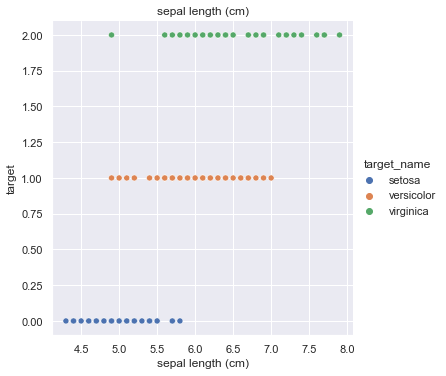

In [24]:
col = "sepal length (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('sepallengthplt.png')
plt.show()

Showing the relationship of sepal width with the target. 

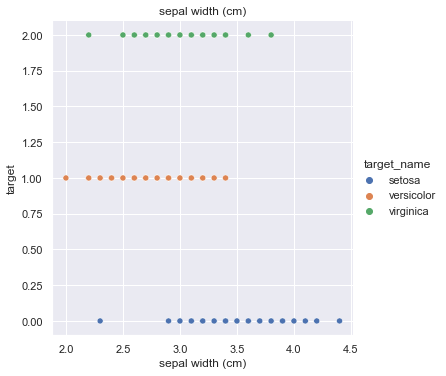

In [25]:
col = "sepal width (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('sepalwidthplt.png')
plt.show()

Showing the relationship of petal length with the target. 

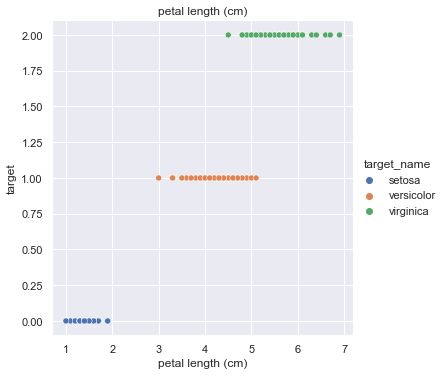

In [26]:
col = "petal length (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('petallengthplt.png')
plt.show()

Showing the relationship of petal width with the target. 

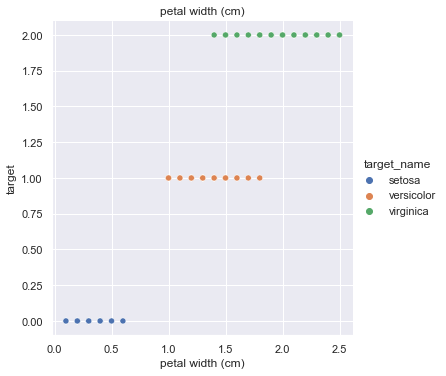

In [27]:
col = "petal width (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('petalwidthplt.png')
plt.show()

Pairplots

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


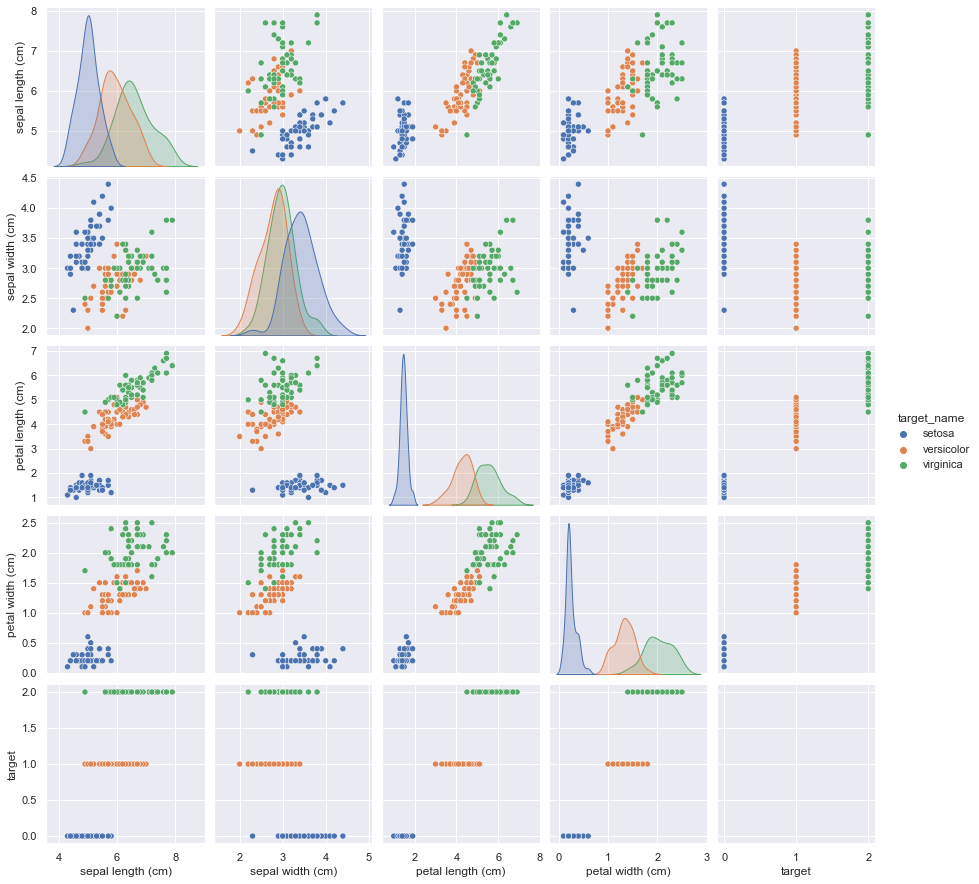

In [28]:
sns.pairplot(df, hue = "target_name")
plt.savefig("snsoverview.png")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


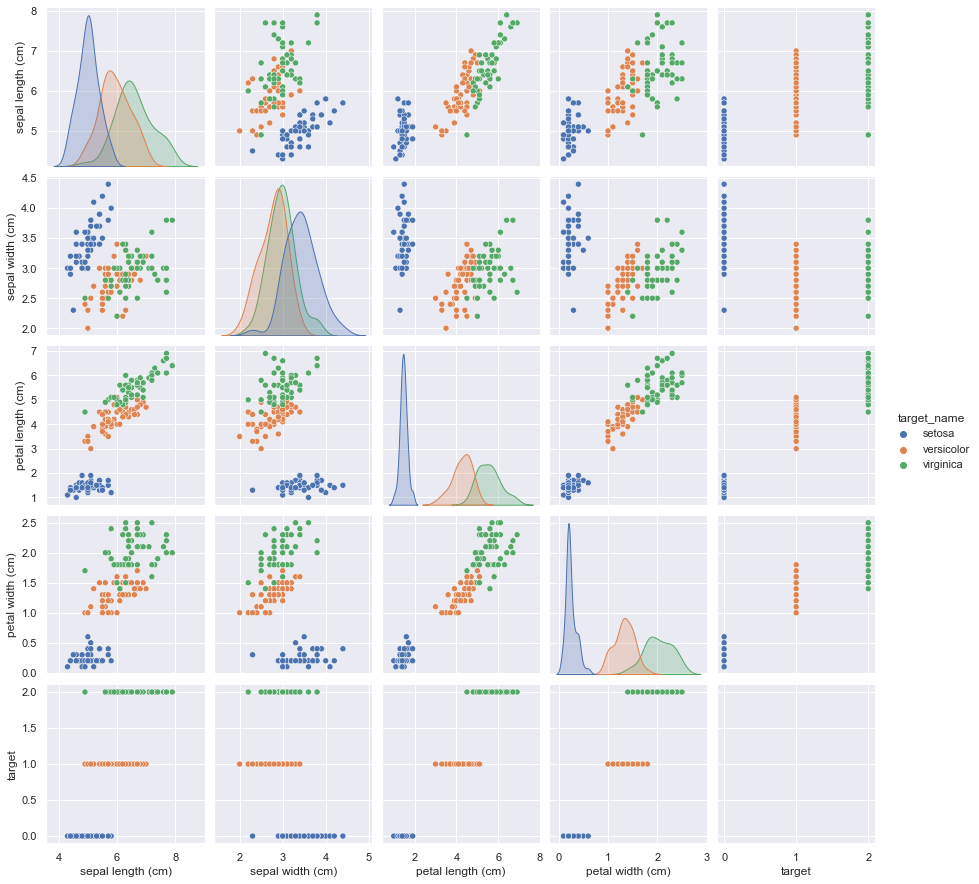

In [30]:
sns.pairplot(df, hue = "target_name")
plt.savefig("snsoverview.png")
plt.show()

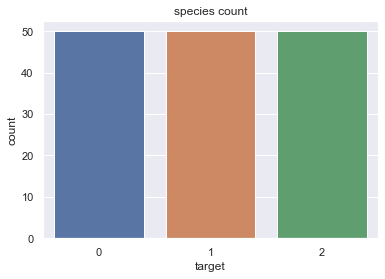

In [34]:
plt.title('species count')
sns.countplot(df['target']);

In [2]:
print (iris.shape)

NameError: name 'iris' is not defined